### About:
4/10/2021 Program calculate the correlation coefficient:

    (1) between internet speeds
    (2) between states
    (3) between states & internet speeds??? -> Self Assigned

#### NOTE: Make sure to unzip the xlsx files

@author: Minh Nguyen @AIA

@credit: Qasim, Andrei @AIA

In [1]:
import numpy as np
from numpy.random import randn
from numpy.random import seed
from numpy import array_split
import pandas as pd
from sklearn import metrics as mt
from sklearn import model_selection as md
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.datasets as ds
import random

### Correlation Calculation

In [2]:
def correlation_cal(df):
    # Instead of just dropping the missing values, we will fill in N/A values
    if df.isna().values.any():
        while True:
            missing_type = input("Please enter the type of missing value replacement: mean, medium, mode, or drop from the row")
            missing_type = missing_type.lower()
            if(missing_type in ['mean', 'median', 'mode', 'drop']):
                if(missing_type == 'mean'):
                    df.fillna(df.mean(), inplace=True)
                elif(missing_type == 'median'):
                    df.fillna(df.median(), inplace=True)
                elif(missing_type == 'mode'):
                    df.fillna(df.mode(), inplace=True)
                else:
                    df.dropna()
                break
            else:
                print("Please input the option from the list")
    
    # Calculate input data correlation
    while True:
        corr_type = input("Please enter type of correlation: Pearson, Spearman, or Kendall: ")
        corr_type = corr_type.lower()
        if corr_type in ['pearson', 'spearman', 'kendall']:
            break
        else:
            print("Please try again")
    
    # Plot correlation matrix
    corrMatrix = df.corr(method=corr_type)
    _, ax = plt.subplots(figsize=(12, 10))
    sns.heatmap(corrMatrix, ax = ax, cmap="gray", linewidths = 0.1) # cmap can also be "YlGnBu"

# (1) Correlation Calculation Between Internet Speeds

#### Preprocess Data

In [3]:
!ls

Correlation 3.ipynb
Original Dataset
preprocessed_data3.xlsx


In [4]:
def parse_data_bis(file):
    """ Function load csv files into csv pandas by internet speed 
        Function parse data by internet speed for all 50 states + nation (row 0)
    """
    dataset = pd.read_excel(file, skiprows=[0,1,2,3], usecols=[2,3,4,5,6,7,8,9,10])
    return dataset

In [5]:
df_bis = parse_data_bis("preprocessed_data3.xlsx")

In [6]:
df_bis.head()

,≥ 786 kbps,≥ 1.5 mbps,≥ 3 mbps,≥ 6 mbps,≥ 10 mbps,≥ 25 mbps,≥ 50 mbps,≥ 100 mbps,≥ 1 gbps
0,1290,1259,1224,1092,961,644,518,353,156
1,15,13,13,11,7,4,3,2,1
2,43,41,39,39,34,22,15,11,5
3,38,35,34,30,26,11,10,4,1
4,2,1,0,0,0,0,0,0,0


### Run 1: Correlation Pearson - Mean

Please enter type of correlation: Pearson, Spearman, or Kendall: Pearson


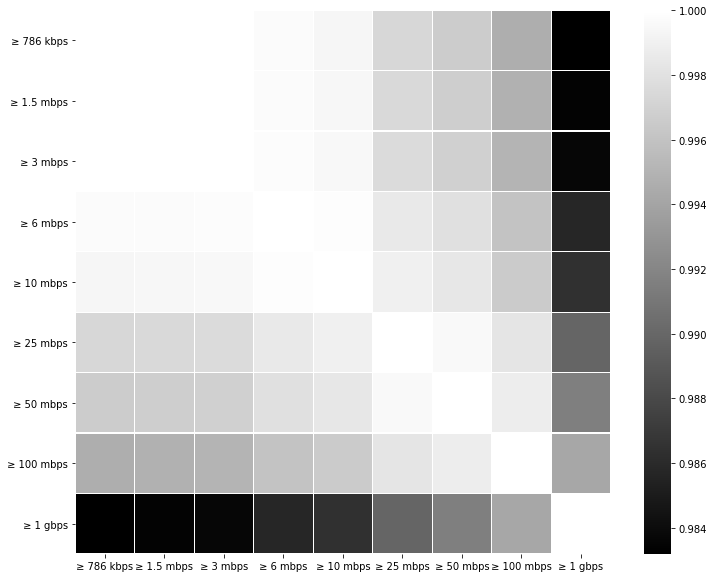

In [7]:
# Run Correlation Pearson
correlation_cal(df_bis)

### Run 2: Correlation Spearman - Mean

Please enter type of correlation: Pearson, Spearman, or Kendall: Spearman


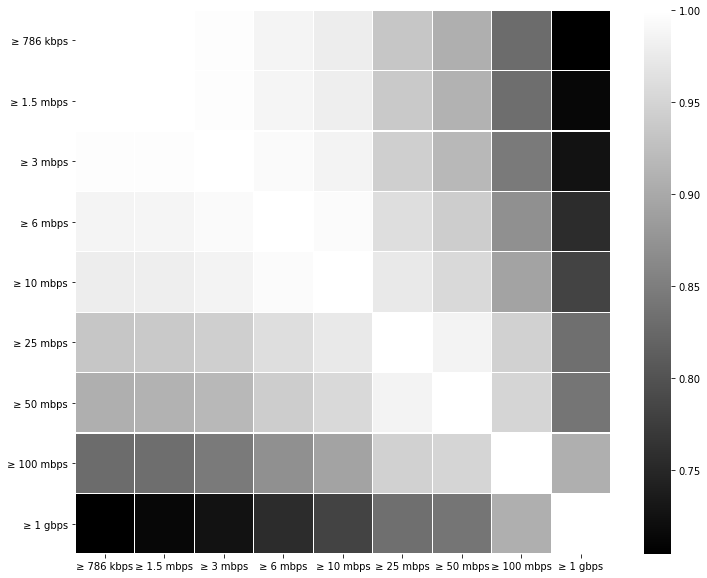

In [8]:
# Run Correlation Spearman
correlation_cal(df_bis)

### Run 3: Correlation Kendall - Mean

Please enter type of correlation: Pearson, Spearman, or Kendall: Kendall


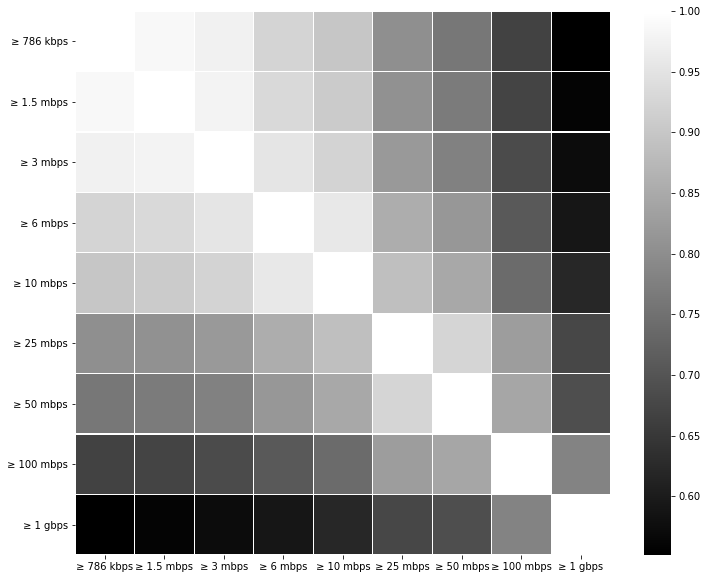

In [9]:
# Run Correlation Kendall
correlation_cal(df_bis)

### Analysis - Self Assigned

1/ What are the two significant correlation coefficient for Pearson, Spearman, Kendall?

2/ What are other analysis we can do with these graphs?

3/ Any other metric besides Pearson, Spearman, Kendall?

# (2) Correlation Calculation Between States

In [10]:
def parse_data_bs(file):
    """ Function load csv files into csv pandas by internet speed 
        Function parse data by states and nation for all 10 types of internet speeds
    """
    dataset = pd.read_excel(file, skiprows=[0,1,2,3,4], usecols=[0,2,3,4,5,6,7,8,9,10], drop=True)
    dataset.set_index("Nationwide", inplace=True)
    dataset = dataset.T
    
    return dataset

In [11]:
df_bs = parse_data_bs("preprocessed_data3.xlsx")

In [12]:
df_bs.head()

Nationwide,Alaska,Alabama,Arkansas,American Samoa,Arizona,California,Colorado,Connecticut,District of Columbia,Delaware,...,Tennessee,Texas,Utah,Virginia,U.S. Virgin Islands,Vermont,Washington,Wisconsin,West Virginia,Wyoming
1290,15,43,38,2,33,46,55,16,12,8,...,48,87,32,31,2,20,58,62,15,16
1259,13,41,35,1,32,45,54,16,12,8,...,47,84,32,30,2,19,58,61,13,16
1224,13,39,34,0,31,45,53,16,12,8,...,47,79,31,30,2,18,57,61,11,15
1092,11,39,30,0,29,43,50,16,12,8,...,46,68,31,26,2,13,53,55,10,14
961,7,34,26,0,26,40,48,15,10,6,...,39,58,29,26,2,13,49,54,9,12


### Run 1: Correlation Pearson - Mean


Please enter type of correlation: Pearson, Spearman, or Kendall: Pearson


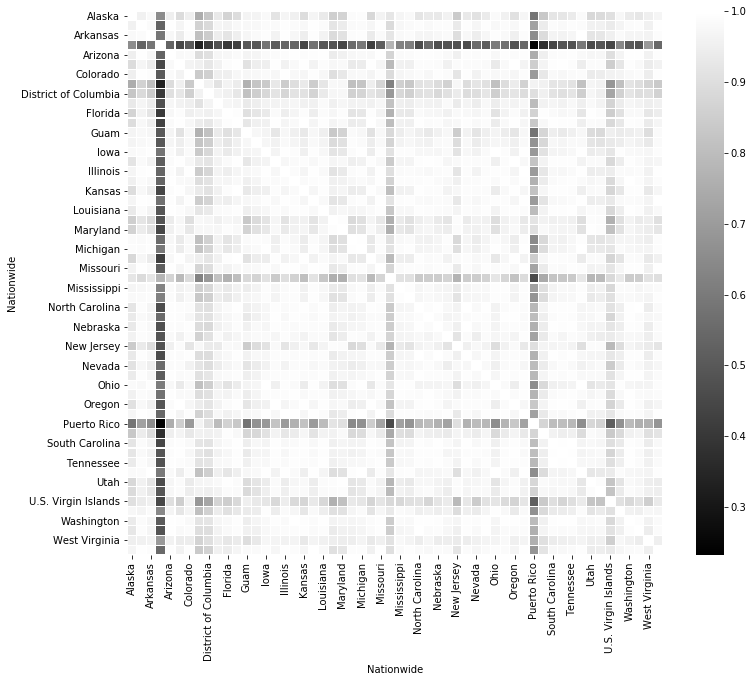

In [13]:
# Run Correlation Pearson
correlation_cal(df_bs)

### Run 2: Correlation Spearman - Mean

Please enter type of correlation: Pearson, Spearman, or Kendall: Spearman


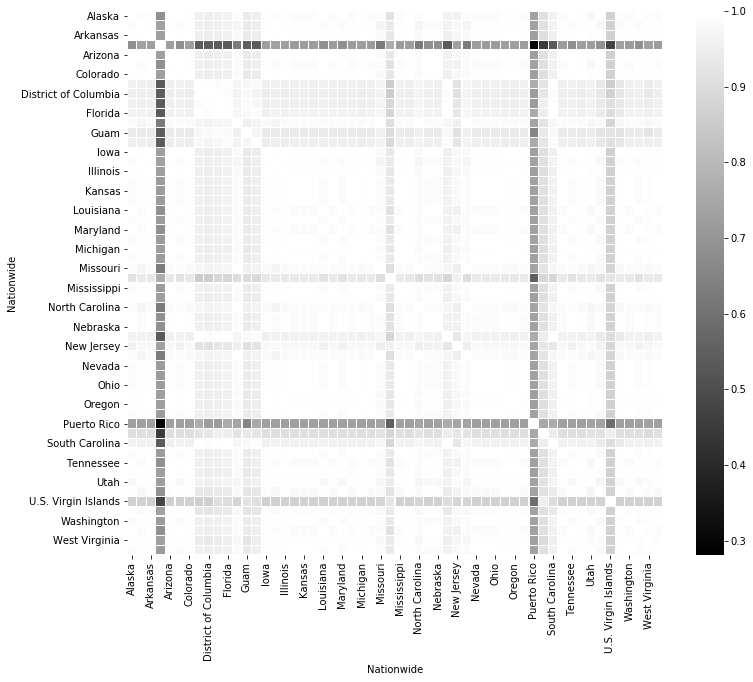

In [14]:
# Run Correlation Spearman
correlation_cal(df_bs)

### Run 3: Correlation Kendall - Mean

Please enter type of correlation: Pearson, Spearman, or Kendall: Kendall


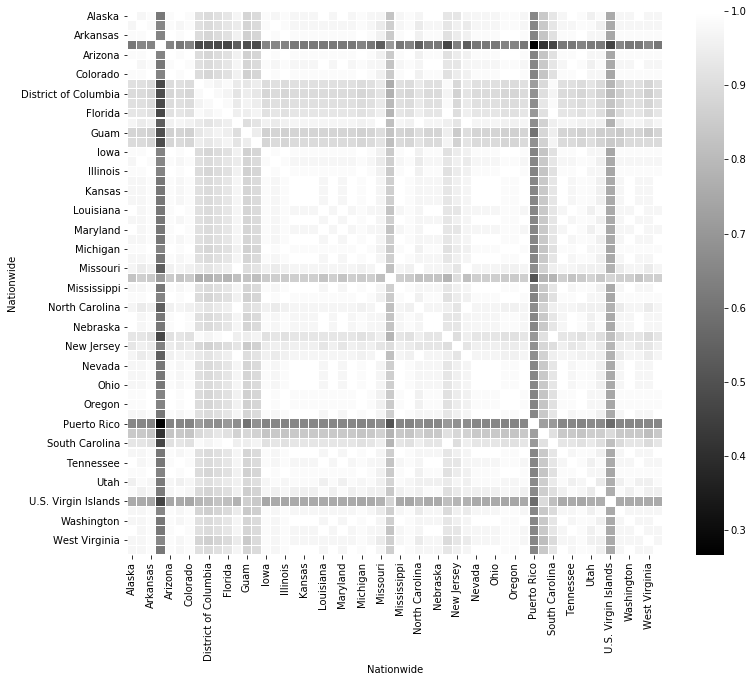

In [15]:
# Run Correlation Kendall
correlation_cal(df_bs)

### Analysis - Self Assigned

1/ What are the two significant correlation coefficient for Pearson, Spearman, Kendall?

2/ What are other analysis we can do with these graphs?

3/ Any other metric besides Pearson, Spearman, Kendall?